<a href="https://colab.research.google.com/github/Vedu-Singh/Data-Science/blob/main/Heart_Disease_Prediction_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Heart Disease Prediction
In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to predict whether any person is suffering from heart disease..
our "goal" predict the presence of heart disease in the patient..**

** Here we will be experimenting with 3 algorithms --->
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier  **





In [ ]:
# import all libraries ->
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the dataset -->
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Predicting-Heart-Disease/master/dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# find missing values -->
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


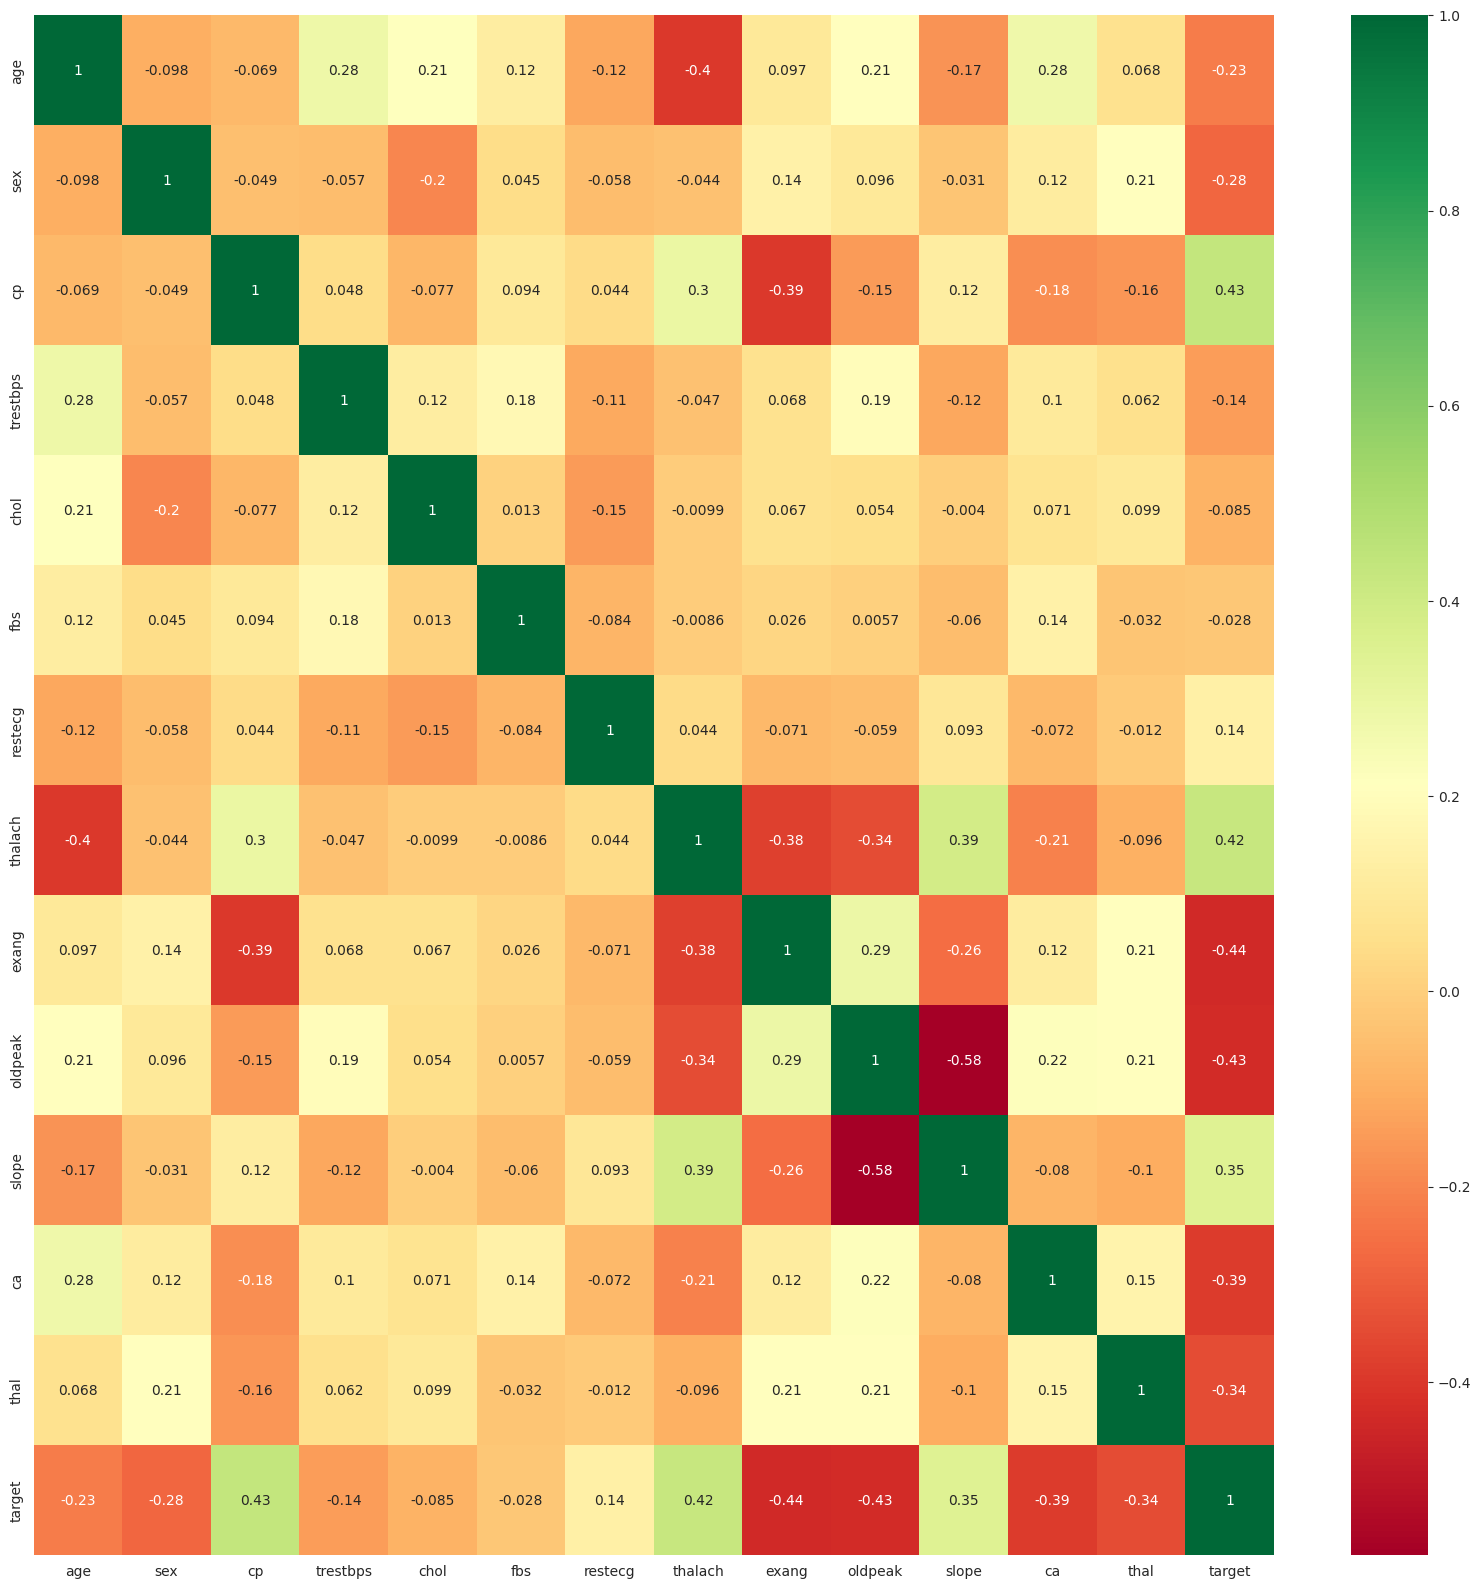

In [ ]:
# FEATURE ENGINEERING ---->
# feature selection ---> using correlation matrix { check wheter all fetures are positively or negatively correlated w.r.t target output which will ensure high/low accuracy of given modal }
# get correlations of each features in dataset -->
corr_mat = df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20))
#plot heat map-->
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

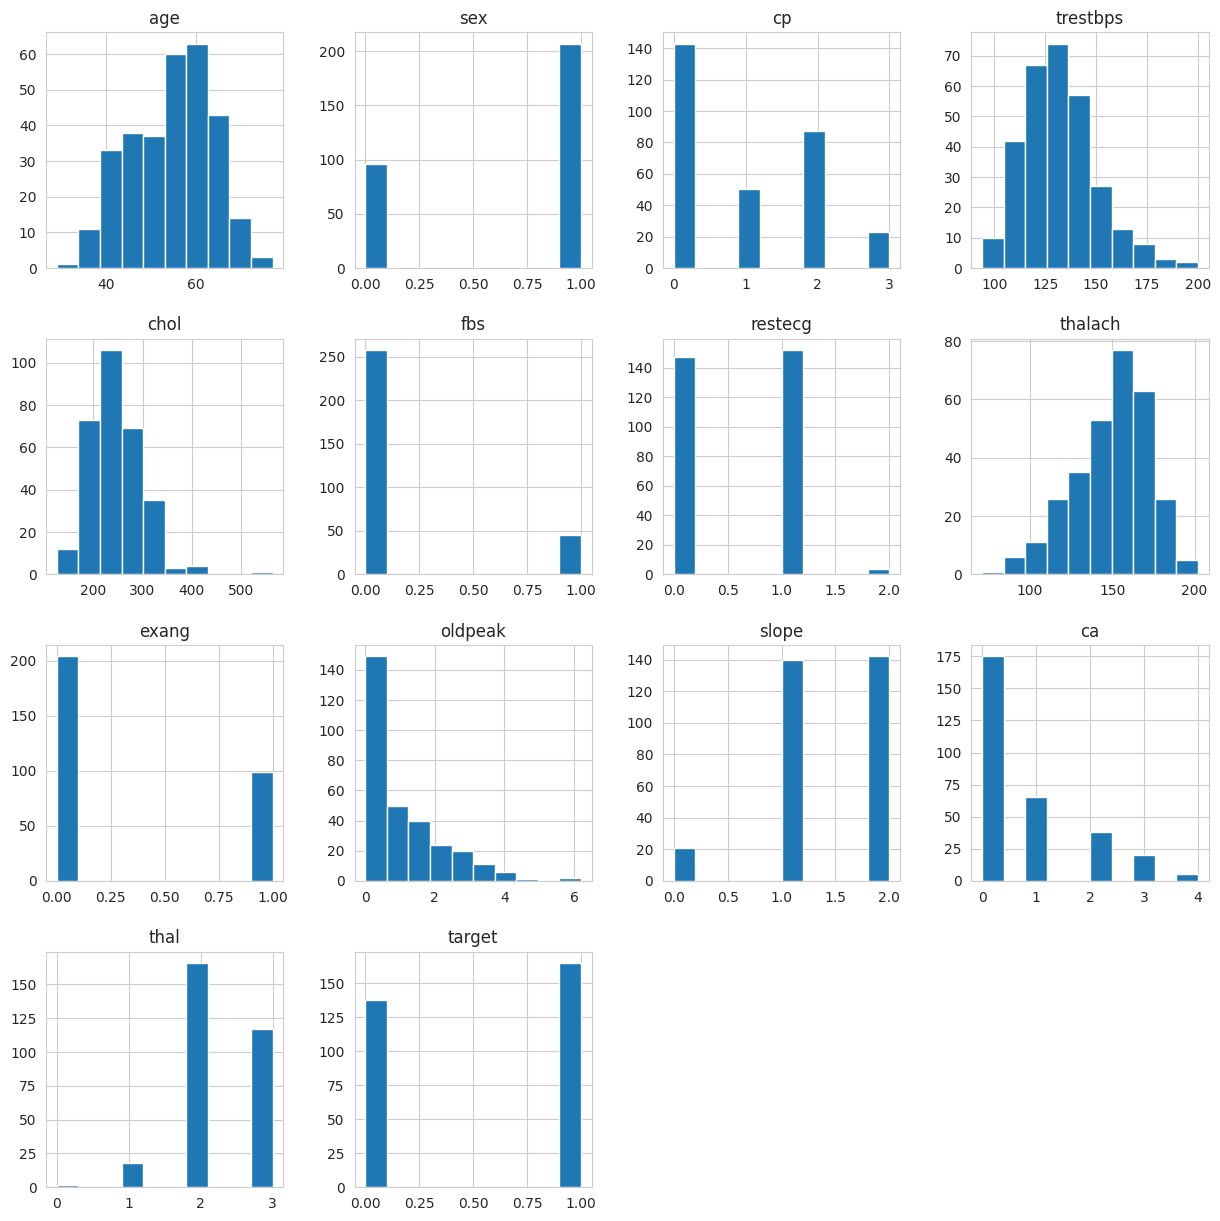

In [ ]:
df.hist(figsize=(15,15))
plt.show()

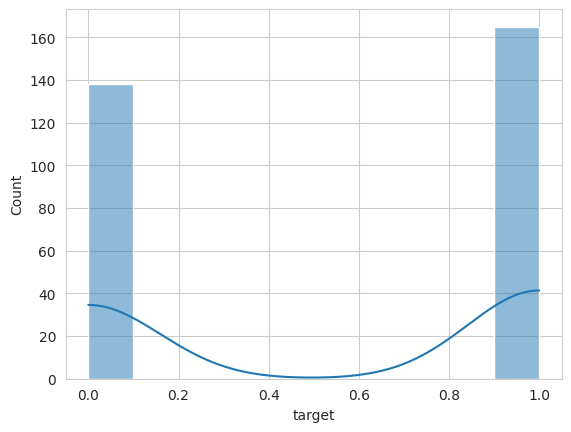

In [ ]:
sns.histplot(df['target'],kde=True)
plt.show()

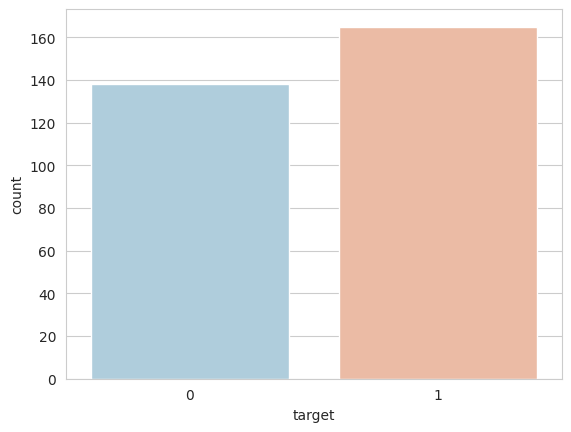

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x='target',data=df,palette='RdBu_r')                         # check for balanced / imbalanced datset --->
plt.show()

In [ ]:
# Data Processing ---> After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler               # some features are having lot of variantions and measure in different units so use standardScaler
model = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = model.fit_transform(df[columns_to_scale])

In [ ]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
# perform train-test split -->
X = df.drop(['target'],axis=1)
y = df['target']

In [ ]:
# perform cross-validation -->
from sklearn.model_selection import cross_val_score

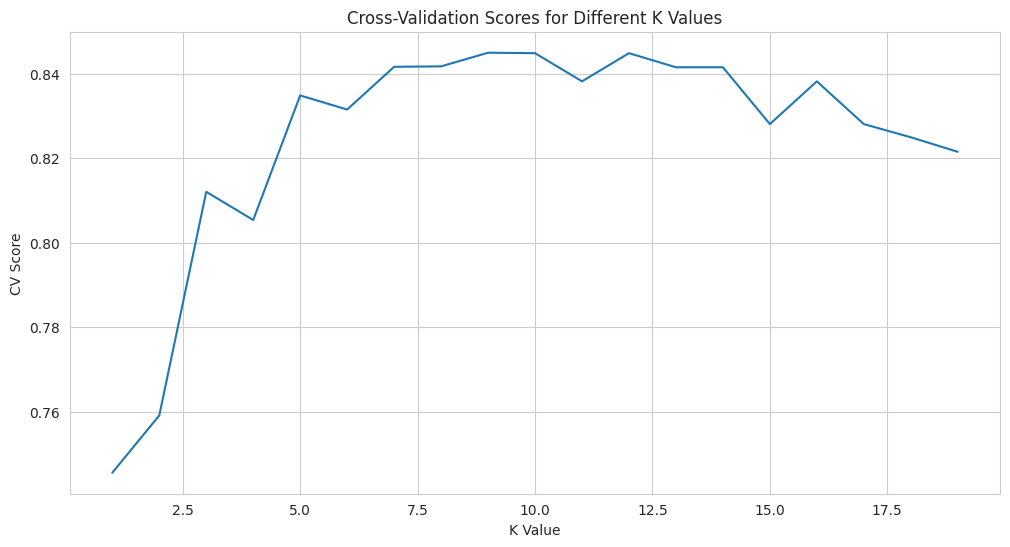

In [ ]:
# Assuming 'X' and 'y' are defined from previous steps

k_values = range(1, 20)  # Range of K values to test
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())  # Store the mean accuracy for each K

plt.figure(figsize=(12, 6))
plt.plot(k_values, cv_scores)  # Now plot k_values vs cv_scores
plt.xlabel('K Value')
plt.ylabel('CV Score')
plt.title('Cross-Validation Scores for Different K Values')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
scores = cross_val_score(knn, X, y, cv=10)
print(scores.mean())

0.8448387096774195


** Random-Forest Classifier **

In [107]:
# implemented using Random-Forest Classifier --->
rf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(rf, X, y, cv=10)
print(scores.mean())

0.8149462365591399


** Descision-Tree Classifier **

In [108]:
# implemented using Descision-Tree Classifier --->
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y, cv=10)
print(scores.mean())

0.7316129032258064


(array([2., 1., 1., 0., 1., 1., 1., 1., 1., 1.]),
 array([0.56666667, 0.60032258, 0.63397849, 0.66763441, 0.70129032,
        0.73494624, 0.76860215, 0.80225806, 0.83591398, 0.86956989,
        0.90322581]),
 <BarContainer object of 10 artists>)

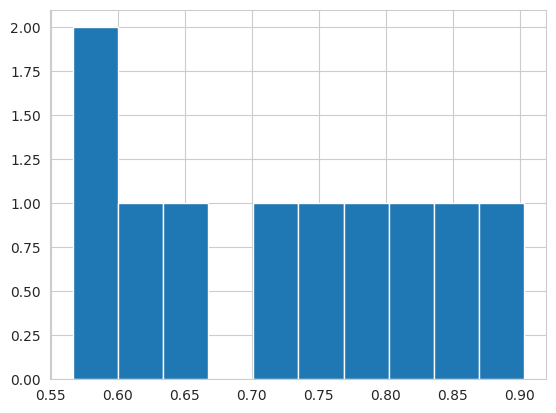

In [109]:
plt.hist(scores)